Enter the word to search:Christopher
Result found in file  a-0.png


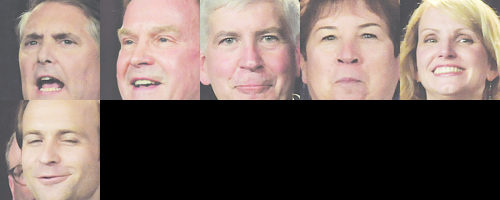

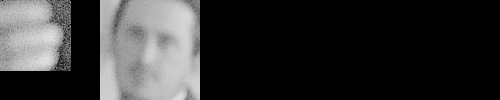

Result found in file  a-3.png
Enter the word to search:Mark
Result found in file  a-0.png


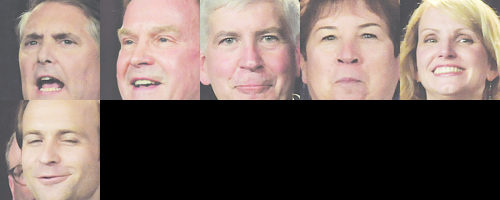

Result found in file  a-1.png


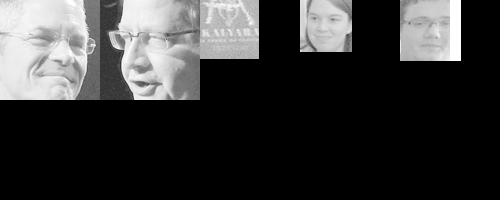

Result found in file  a-10.png
But there were no faces in that file!
Result found in file  a-13.png


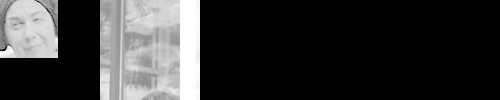

Result found in file  a-2.png


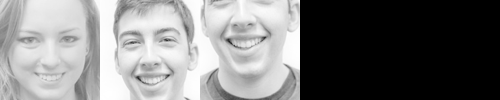

Result found in file  a-3.png


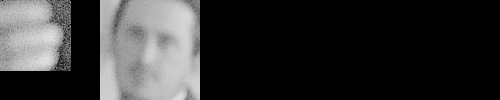

Result found in file  a-8.png


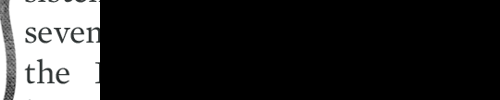

Enter the word to search:House
Result found in file  a-0.png


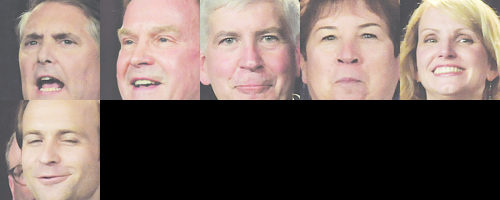

Result found in file  a-1.png


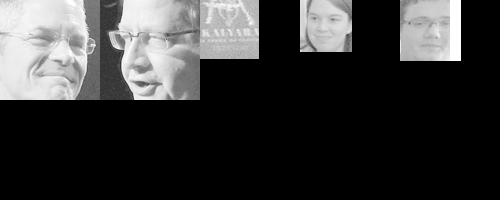

Result found in file  a-3.png


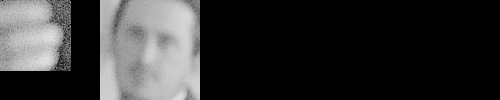

In [ ]:
import zipfile
import PIL
from PIL import Image, ImageDraw
from IPython.display import display
from PIL import ImageEnhance
import pytesseract
import cv2 as cv
import numpy as np
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

imgzip = zipfile.ZipFile("images.zip")
inflist = imgzip.infolist()
imagedic=dict()
textdic=dict()
arr=[]
def contact(arr):
    if len(arr)==0:
        return None
    first_image=arr[0]
    k=len(arr)
    l=int(k/5)
    l+=1
    w=5*100
    h=l*100
    img1 = PIL.Image.new(arr[0].mode,(w,h))
    x=0
    y=0
    for j in arr:
        img1.paste(j,(x,y))
        if x+100==w:
            x=0
            y+=100
        else:
            x+=100
    return img1

max_size=(100,100)
def run():
    
    for f in inflist:
        ifile = imgzip.open(f)
        img = Image.open(ifile)

        imggray=img.convert('L')

        text = pytesseract.image_to_string(imggray, lang='eng')
        textdic[ifile.name]=text
        open_cv_image = np.array(img) 
        open_cv_image = open_cv_image[:, :, ::-1].copy() 
        faces = face_cascade.detectMultiScale(open_cv_image,1.35)
        drawing=ImageDraw.Draw(img)
        for x,y,w,h in faces:
            face=img.crop((x,y,x+w,y+h))
            face.thumbnail(max_size)
            arr.append(face)
        if contact(arr)!=None:
            imagedic[ifile.name]=contact(arr)
        arr.clear()
run()

name =  input("Enter the word to search:")
while name != "stop":
    
    for key in textdic:
        if(textdic[key].__contains__(name)):
            print("Result found in file ", key)
            if key in imagedic:
                if key==None:
                    print("But there were no faces in that file!")
                else:
                    display(imagedic[key])
            else:
                print("But there were no faces in that file!")
    name =  input("Enter the word to search:")
        
        

    
    